# Data Analysis on Iris Dataset

## Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Importing the dataset

In [2]:
df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## We don't need id column name so we dropped it.
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Preprocessing the dataset

In [6]:
## Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory data analysis

### Histogram

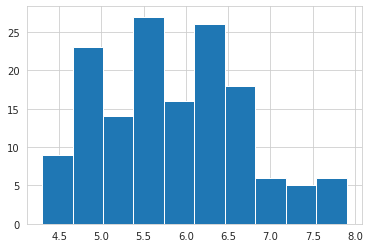

In [7]:
df['SepalLengthCm'].hist()
plt.show()

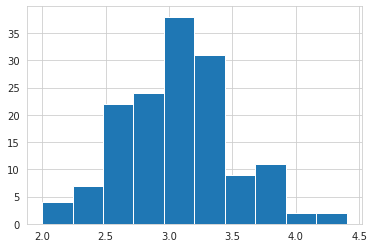

In [8]:
df['SepalWidthCm'].hist()
plt.show()

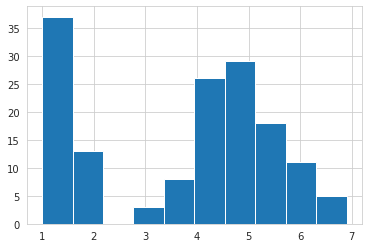

In [9]:
df['PetalLengthCm'].hist()
plt.show()

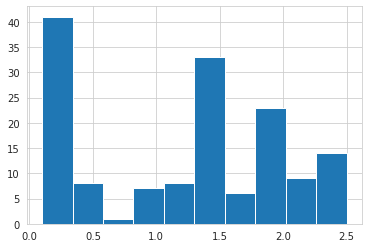

In [10]:
df['PetalWidthCm'].hist()
plt.show()

### Scatterplot

In [11]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

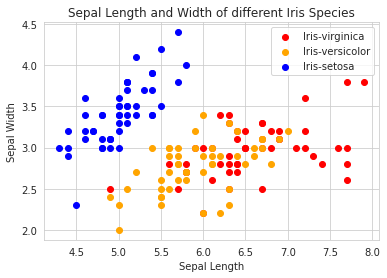

In [12]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])

plt.title('Sepal Length and Width of different Iris Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

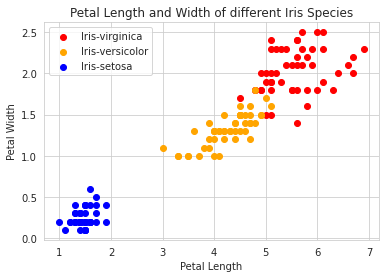

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])

plt.title('Petal Length and Width of different Iris Species')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

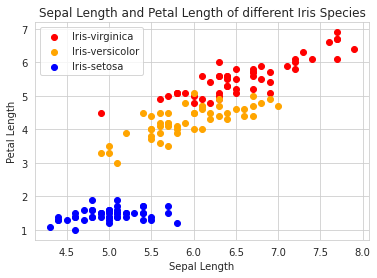

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])

plt.title('Sepal Length and Petal Length of different Iris Species')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

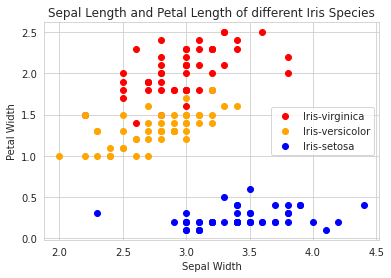

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])

plt.title('Sepal Length and Petal Length of different Iris Species')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation , we can neglet one variable from these two.

In [16]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

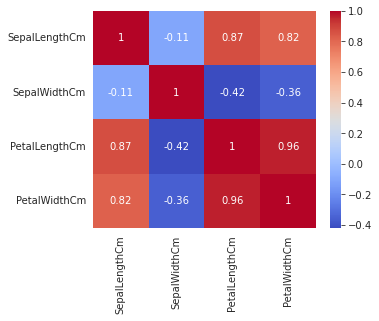

In [17]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(corr, annot = True, ax = ax, cmap='coolwarm')

## Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting the data into independent and dependent variable i.e. X and y

In [19]:
X = df.drop('Species', axis=1)
y = df['Species']

### Splitting the data into training and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model Training

#### For model training, we use Logistic Regression first

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_predLR = model.predict(X_test)
y_predLR

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [23]:
## Printing the accuracy to get the performance
print('Accuracy of Logistic Regression: ', model.score(X_test, y_test) * 100,'%')

Accuracy of Logistic Regression:  97.77777777777777 %


In [32]:
### Confusion Metrics
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predLR)
cm1

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

#### Now we are using KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_predKNN = knn.predict(X_test)
y_predKNN

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [26]:
## Printing the accuracy to get the performance
print('Accuracy of KNN: ', knn.score(X_test, y_test) * 100,'%')

Accuracy of KNN:  97.77777777777777 %


In [35]:
### Confusion Metrics
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predKNN)
cm2

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

#### Using Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_predDTC = dtc.predict(X_test)
y_predDTC

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [29]:
## Printing the accuracy to get the performance
print('Accuracy of Decision Tree Classifier: ', dtc.score(X_test, y_test) * 100,'%')

Accuracy of Decision Tree Classifier:  97.77777777777777 %


In [36]:
### Confusion Metrics
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predDTC)
cm3

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])